In [101]:
import pandas as pd
import matplotlib
import datetime
import numpy as np
import seaborn as sns

In [177]:
df = pd.read_csv("ZAll_Combine_Stock_Histry.csv")
df = df.dropna()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
12575,29-07-2022,128.320007,132.259995,128.009995,132.050003,132.050003,10045500,WLMART
12576,01-08-2022,131.059998,134.229996,131.000000,132.539993,132.539993,8332100,WLMART
12577,02-08-2022,133.149994,133.710007,131.399994,132.679993,132.679993,6565000,WLMART
12578,03-08-2022,132.160004,132.940002,129.860001,130.500000,130.500000,10667700,WLMART
12579,04-08-2022,130.669998,130.800003,125.330002,125.570000,125.570000,17702000,WLMART


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12580 entries, 0 to 12579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        12580 non-null  datetime64[ns]
 1   Open        12580 non-null  float64       
 2   High        12580 non-null  float64       
 3   Low         12580 non-null  float64       
 4   Close       12580 non-null  float64       
 5   Adj Close   12580 non-null  float64       
 6   Volume      12580 non-null  int64         
 7   Company     12580 non-null  object        
 8   Day Change  12580 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 884.7+ KB


In [178]:
df["Date"] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [10]:
df["Company"].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'JP-MRGN', 'M-SOFT', 'NTFLX', 'NVDA',
       'TSLA', 'VISA', 'WLMART'], dtype=object)

In [180]:
apple = df[df["Company"] == "AAPL"]
amazon = df[df["Company"] == "AMZN"]
tesla = df[df["Company"] == "TSLA"]
google = df[df["Company"] == "GOOGL"]
jp_morgan = df[df["Company"] == "JP-MRGN"]
microsoft = df[df["Company"] == "M-SOFT"]
netflix = df[df["Company"] == "NTFLX"]
nvidia = df[df["Company"] == "NVDA"]
visa = df[df["Company"] == "VISA"]
walmart = df[df["Company"] == "WLMART"]

In [19]:
df[["Open","High","Low","Close","Adj Close","Volume"]].min().astype("int64")

Open              31
High              32
Low               31
Close             31
Adj Close         31
Volume       1144000
dtype: int64

In [20]:
df[["Open","High","Low","Close","Adj Close","Volume"]].max().astype("int64")

Open              1234
High              1243
Low               1217
Close             1229
Adj Close         1229
Volume       426510000
dtype: int64

In [18]:
df[["Open","High","Low","Close","Adj Close","Volume"]].mean().astype("int64")

Open              171
High              174
Low               169
Close             171
Adj Close         169
Volume       39778081
dtype: int64

No outliers seem to be in the data

In [21]:
amazon[["Open","High","Low","Close","Adj Close","Volume"]].mean().astype("int64")

Open              115
High              116
Low               113
Close             115
Adj Close         115
Volume       86356995
dtype: int64

In [22]:
apple[["Open","High","Low","Close","Adj Close","Volume"]].mean().astype("int64")

Open                89
High                90
Low                 88
Close               89
Adj Close           88
Volume       119120086
dtype: int64

In [179]:
df["Day Change"] = df["Close"] - df["Open"]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Day Change
0,2017-08-07,39.264999,39.730000,39.167500,39.702499,37.585022,87481200,AAPL,0.437500
1,2017-08-08,39.650002,40.457500,39.567501,40.020000,37.885582,144823600,AAPL,0.369998
2,2017-08-09,39.814999,40.317501,39.777500,40.264999,38.117512,104526000,AAPL,0.450000
3,2017-08-10,39.974998,40.000000,38.657501,38.830002,36.903397,163217200,AAPL,-1.144996
4,2017-08-11,39.150002,39.642502,39.017502,39.369999,37.416603,105028400,AAPL,0.219997


In [32]:
df["Day Change"].mean()

0.0011560750397456745

In [33]:
amazon["Day Change"].mean()

-0.05442380524642285

<AxesSubplot:>

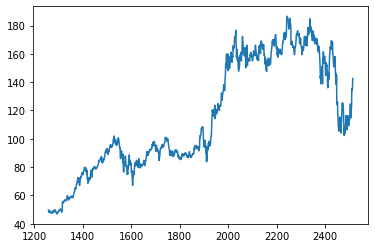

In [142]:
amazon["Close"].plot()

<AxesSubplot:xlabel='Date', ylabel='Day Change'>

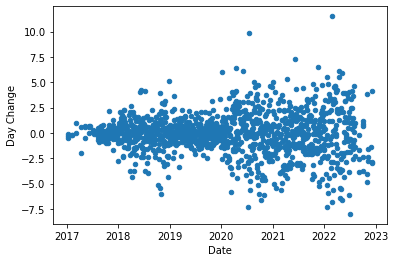

In [148]:
amazon.plot(kind="scatter",x="Date",y="Day Change")

<AxesSubplot:ylabel='Frequency'>

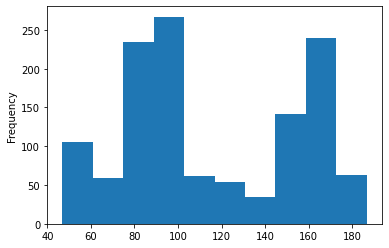

In [149]:
amazon["Close"].plot(kind='hist')

In [48]:
amazon.corr()

,Open,High,Low,Close,Adj Close,Volume,Day Change
Open,1.000000,0.999446,0.999330,0.998663,0.998663,-0.164044,-0.060783
High,0.999446,1.000000,0.999157,0.999370,0.999370,-0.153538,-0.036416
Low,0.999330,0.999157,1.000000,0.999374,0.999374,-0.178530,-0.034097
Close,0.998663,0.999370,0.999374,1.000000,1.000000,-0.166180,-0.009104
Adj Close,0.998663,0.999370,0.999374,1.000000,1.000000,-0.166180,-0.009104
Volume,-0.164044,-0.153538,-0.178530,-0.166180,-0.166180,1.000000,-0.035516
Day Change,-0.060783,-0.036416,-0.034097,-0.009104,-0.009104,-0.035516,1.000000


Data shows little correlation between volume and stock cost.

In [50]:
amazon["Day Change"].max()

11.520508000000007

In [51]:
amazon["Day Change"].mean()

-0.05442380524642285

In [150]:
amazon[amazon["Day Change"] > 10]

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Day Change
2404,2022-02-24,139.837494,151.748993,139.5,151.358002,151.358002,100786000,AMZN,11.520508


In [182]:
amazon[(amazon["Date"] > datetime.datetime(2022, 2, 1))&(amazon["Date"] < datetime.datetime(2022, 3, 20))].sort_values("Date")

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Day Change
2389,2022-02-02,155.050507,155.074997,148.863495,150.612503,150.612503,87330000,AMZN,-4.438004
2390,2022-02-03,141.737503,144.247498,138.332993,138.845505,138.845505,225532000,AMZN,-2.891998
2391,2022-02-04,155.606506,161.199997,150.608002,157.639496,157.639496,253456000,AMZN,2.032990
2392,2022-02-07,158.520004,162.690994,157.250000,157.935501,157.935501,102624000,AMZN,-0.584503
2393,2022-02-08,156.750504,161.792496,155.550507,161.413498,161.413498,76040000,AMZN,4.662994
2394,2022-02-09,162.873505,163.834503,160.250000,161.189499,161.189499,68786000,AMZN,-1.684006
2395,2022-02-10,158.350006,160.716507,157.750000,159.003494,159.003494,68268000,AMZN,0.653488
2396,2022-02-11,158.134506,159.000000,152.733994,153.293503,153.293503,77100000,AMZN,-4.841003
2397,2022-02-14,151.751007,158.448502,151.649994,155.167007,155.167007,83230000,AMZN,3.416000
2398,2022-02-15,157.605499,158.007004,154.637497,156.510498,156.510498,56440000,AMZN,-1.095001


['AAPL', 'AMZN', 'GOOGL', 'JP-MRGN', 'M-SOFT', 'NTFLX', 'NVDA',
       'TSLA', 'VISA', 'WLMART']

In [96]:
print(f'apple: {apple["Day Change"].max()}')
print(f'amazon: {amazon["Day Change"].max()}')
print(f'google: {google["Day Change"].max()}')
print(f'jp_morgan: {jp_morgan["Day Change"].max()}')
print(f'microsoft: {microsoft["Day Change"].max()}')
print(f'netflix: {netflix["Day Change"].max()}')
print(f'nvidia: {nvidia["Day Change"].max()}')
print(f'tesla: {tesla["Day Change"].max()}')
print(f'visa: {visa["Day Change"].max()}')
print(f'walmart: {walmart["Day Change"].max()}')

apple: 10.160002999999989
amazon: 11.520508000000007
google: 7.67349200000001
jp_morgan: 7.920006000000001
microsoft: 22.079985999999963
netflix: 55.03002900000001
nvidia: 27.330002000000007
tesla: 100.3800050000001
visa: 13.930008000000015
walmart: 8.5


In [98]:
print(f'apple: {apple["Day Change"].mean()}')
print(f'amazon: {amazon["Day Change"].mean()}')
print(f'google: {google["Day Change"].mean()}')
print(f'jp_morgan: {jp_morgan["Day Change"].mean()}')
print(f'microsoft: {microsoft["Day Change"].mean()}')
print(f'netflix: {netflix["Day Change"].mean()}')
print(f'nvidia: {nvidia["Day Change"].mean()}')
print(f'tesla: {tesla["Day Change"].mean()}')
print(f'visa: {visa["Day Change"].mean()}')
print(f'walmart: {walmart["Day Change"].mean()}')

apple: 0.0787340468998409
amazon: -0.05442380524642285
google: 0.04545940302066748
jp_morgan: -0.028942919713831654
microsoft: 0.04098567488076342
netflix: -0.04163781160572392
nvidia: -0.026571811605723396
tesla: -0.02699440143084112
visa: -0.015771098569157663
walmart: 0.04072347376788554


In [121]:
print(f'apple: {apple["Day Change"].std()}')
print(f'amazon: {amazon["Day Change"].std()}')
print(f'google: {google["Day Change"].std()}')
print(f'jp_morgan: {jp_morgan["Day Change"].std()}')
print(f'microsoft: {microsoft["Day Change"].std()}')
print(f'netflix: {netflix["Day Change"].std()}')
print(f'nvidia: {nvidia["Day Change"].std()}')
print(f'tesla: {tesla["Day Change"].std()}')
print(f'visa: {visa["Day Change"].std()}')
print(f'walmart: {walmart["Day Change"].std()}')

apple: 1.602483756396684
amazon: 2.0581419830712098
google: 1.2753014250332646
jp_morgan: 1.546923222054684
microsoft: 2.852963321823142
netflix: 8.23218999441081
nvidia: 3.861708193245366
tesla: 17.020391861692584
visa: 2.4265799976243567
walmart: 1.4043708354547895


Tesla has a large deviation in its stock prices, though they tend to average out.

Google and Walmart had a small deviation and very stable stock prices

Overall these ten companies have had fairly stable stock prices since 2017

<AxesSubplot:xlabel='Date', ylabel='Day Change'>

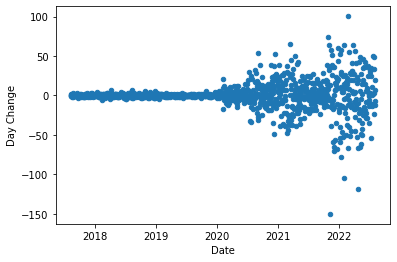

In [204]:
tesla.plot(kind="scatter",x="Date",y="Day Change")

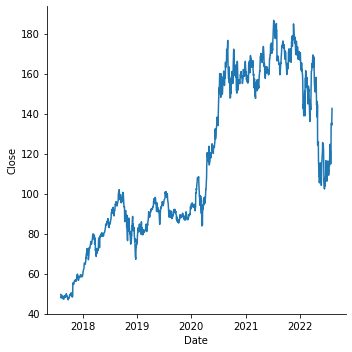

In [202]:
sns.relplot(x="Date",y="Close",kind="line",data=amazon)

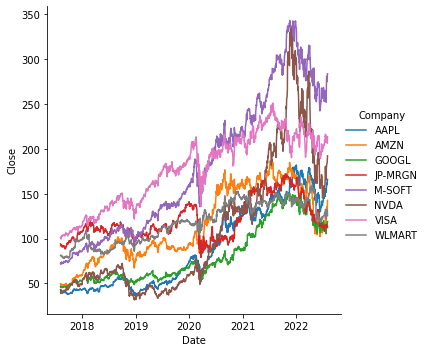

In [201]:
sns.relplot(x="Date",y="Close",kind="line",hue="Company",data=df[(df["Company"]!="TSLA")&(df["Company"]!="NTFLX")])

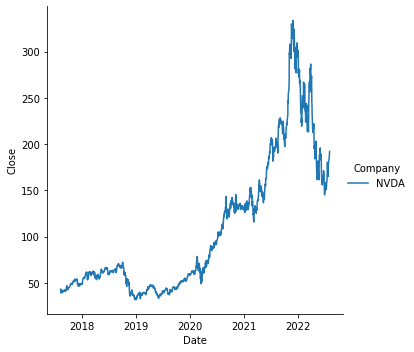

In [205]:
sns.relplot(x="Date",y="Close",kind="line",hue="Company",data=df[(df["Company"]=="NVDA")])

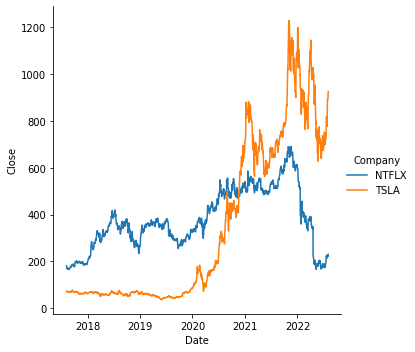

In [200]:
sns.relplot(x="Date",y="Close",kind="line",hue="Company",data=df[(df["Company"]=="TSLA")|(df["Company"]=="NTFLX")])

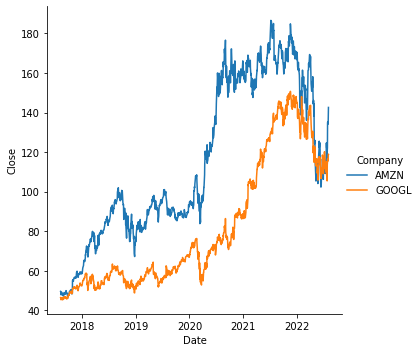

In [199]:
sns.relplot(x="Date",y="Close",kind="line",hue="Company",data=df[(df["Company"]=="AMZN")|(df["Company"]=="GOOGL")])

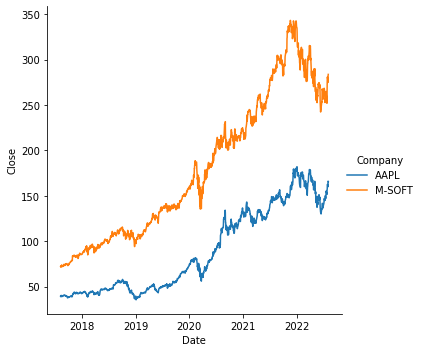

In [198]:
sns.relplot(x="Date",y="Close",kind="line",hue="Company",data=df[(df["Company"]=="AAPL")|(df["Company"]=="M-SOFT")])

The next set will take a little while to generate

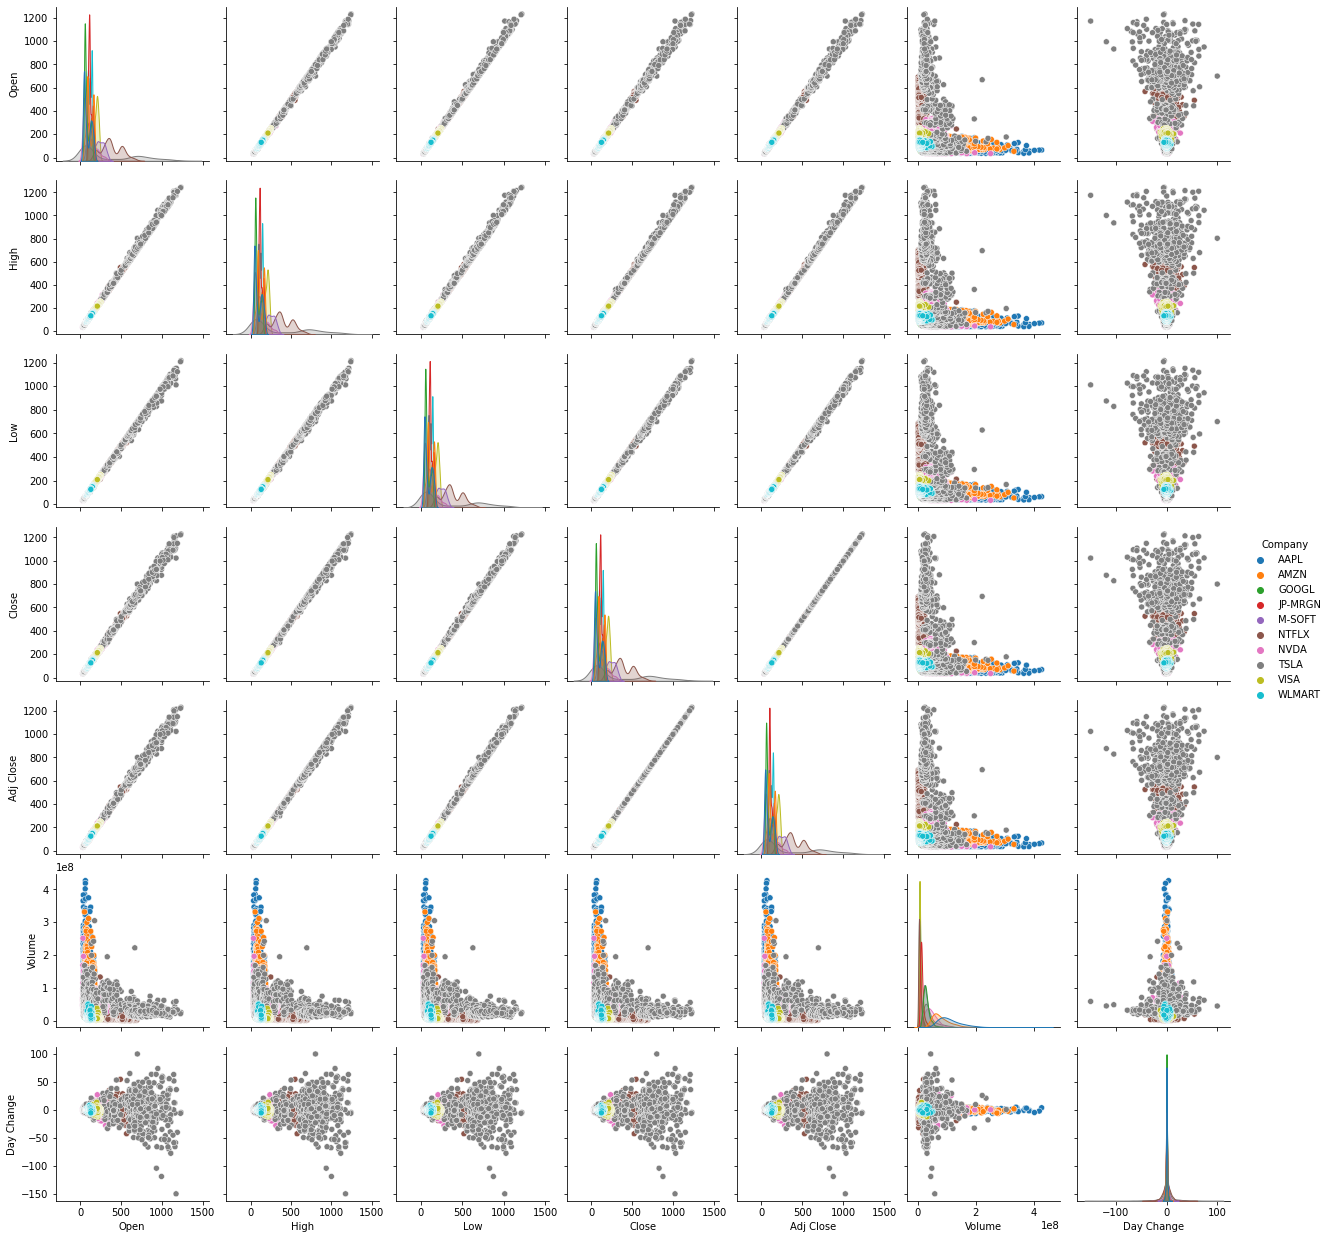

In [197]:
sns.pairplot(data=df, hue="Company")

Recent events have had a positive effect on all of these companies.

Their stock prices have risen in general over the last few years

In [183]:
print(f'change since: {df["Date"].min()}')
print(f'apple: {apple["Close"].max() - apple["Close"].min()} Mean: {apple["Close"].mean()}')
print(f'amazon: {amazon["Close"].max() - amazon["Close"].min()} Mean: {amazon["Close"].mean()}')
print(f'google: {google["Close"].max() - google["Close"].min()} Mean: {google["Close"].mean()}')
print(f'jp_morgan: {jp_morgan["Close"].max() - jp_morgan["Close"].min()} Mean: {jp_morgan["Close"].mean()}')
print(f'microsoft: {microsoft["Close"].max() - microsoft["Close"].min()} Mean: {microsoft["Close"].mean()}')
print(f'netflix: {netflix["Close"].max() - netflix["Close"].min()} Mean: {netflix["Close"].mean()}')
print(f'nvidia: {nvidia["Close"].max() - nvidia["Close"].min()} Mean: {nvidia["Close"].mean()}')
print(f'tesla: {tesla["Close"].max() - tesla["Close"].min()} Mean: {tesla["Close"].mean()}')
print(f'visa: {visa["Close"].max() - visa["Close"].min()} Mean: {visa["Close"].mean()}')
print(f'walmart: {walmart["Close"].max() - walmart["Close"].min()} Mean: {walmart["Close"].mean()}')

change since: 2017-08-07 00:00:00
apple: 146.462494 Mean: 89.2510413672496
amazon: 139.64049599999998 Mean: 115.08570695151033
google: 105.376 Mean: 81.73360275596184
jp_morgan: 92.75 Mean: 120.95527018044514
microsoft: 271.699981 Mean: 180.02508741812397
netflix: 525.7400050000001 Mean: 381.7061761136725
nvidia: 301.99001000000004 Mean: 107.99150241891893
tesla: 1194.116035 Mean: 344.9585096955485
visa: 151.439995 Mean: 176.9550795254372
walmart: 81.83999599999999 Mean: 117.85469007154214


Tesla while being the most unstable they have also had the greatest gains in the last few years.



In [184]:
df[df["Date"] >= datetime.datetime(2022,8,4)]

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Day Change
1257,2022-08-04,166.009995,167.190002,164.429993,165.809998,165.809998,55474100,AAPL,-0.199997
2515,2022-08-04,140.580002,143.559998,139.550003,142.570007,142.570007,70585000,AMZN,1.990005
3773,2022-08-04,118.300003,119.500000,117.709999,118.870003,118.870003,15757700,GOOGL,0.570000
5031,2022-08-04,112.849998,113.320000,111.019997,112.360001,112.360001,18033900,JP-MRGN,-0.489997
6289,2022-08-04,281.799988,283.799988,280.170013,283.649994,283.649994,18098700,M-SOFT,1.850006
7547,2022-08-04,227.679993,232.070007,225.050003,229.910004,229.910004,7142700,NTFLX,2.230011
8805,2022-08-04,188.490005,192.740005,187.600006,192.149994,192.149994,40965200,NVDA,3.659989
10063,2022-08-04,933.000000,940.820007,915.000000,925.900024,925.900024,24085400,TSLA,-7.099976
11321,2022-08-04,210.529999,214.880005,208.550003,213.470001,213.470001,6789700,VISA,2.940002
12579,2022-08-04,130.669998,130.800003,125.330002,125.570000,125.570000,17702000,WLMART,-5.099998


In [195]:
recent = df[df["Date"] > datetime.datetime(2022,7,4)]

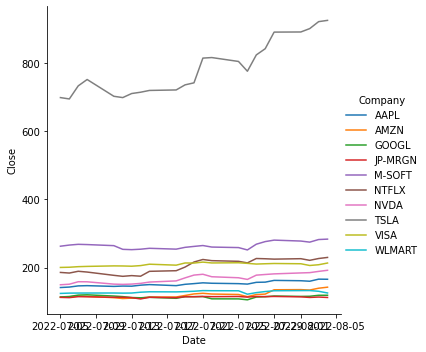

In [196]:
sns.relplot(x="Date",y="Close",kind="line",hue="Company",data=recent)

Tesla's stock has been steadily increasing over the last month making them a logical buy though they are also the most unstable of the stocks.

All stocks seem to have dipped lately which could mean its a good time to buy.

The dips seem to just be turning around now which means we are at the base of a valley when looking at the last few years though it can't be seen in the past month.

In [207]:
amazon.to_json("amazon.json")
apple.to_json("apple.json")
google.to_json("google.json")
jp_morgan.to_json("jp_morgan.json")
microsoft.to_json("microsoft.json")
netflix.to_json("netflix.json")
nvidia.to_json("nvidia.json")
tesla.to_json("tesla.json")
visa.to_json("visa.json")
walmart.to_json("walmart.json")
df.to_json("combined.json")